In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Visualize results of Data augmentation with DL

In [3]:
import pandas as pd
import seaborn as sns
import os
%matplotlib inline
import matplotlib.pyplot as plt
from textwrap import wrap
import pickle as pkl
import itertools
import glob
import numpy as np

In [3]:
sRoot='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented'

In [8]:
lsAugMethods=glob.glob(f'{sRoot}/*')

In [12]:
dResults={}

In [14]:
for sAugMethod in lsAugMethods:
    dResults[sAugMethod.split('/')[-1]]={}
    for iCV in range(3):
        sFile=f'{sAugMethod}/Dense_08Dense_History_CV{iCV}.p'
        try:
            dResults[sAugMethod.split('/')[-1]][iCV]=pkl.load(open(sFile, 'rb'))
        except:
            dResults[sAugMethod.split('/')[-1]][iCV]=0

In [17]:
sType=list(dResults.keys())[0]
iCV=0


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [4]:
import scipy as sp

In [64]:
sp.fftpack

<module 'scipy.fftpack' from '/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/scipy/fftpack/__init__.py'>

In [5]:
def fSmooth(aArray):
   
    import scipy as sp
    
    aSig=sp.ndimage.gaussian_filter(aArray, 5)
    
    return aSig

In [102]:
def fPlotTraining(dSingleResult, sTitle, sSaveLoc):
    try:
        aValAcc=(np.array(dSingleResult[0].history['val_acc'])+ np.array(dSingleResult[1].history['val_acc'])+ np.array(dSingleResult[2].history['val_acc']))/3.0
        aAcc=(np.array(dSingleResult[0].history['acc'])+ np.array(dSingleResult[1].history['acc'])+ np.array(dSingleResult[2].history['acc']))/3.0
    except:
        return 0
    
    if np.max(aValAcc)>0.75 and np.max(fSmooth(aValAcc))>0.75:
        plt.plot(range(len(aValAcc)), fSmooth(aValAcc))
        plt.plot(range(len(aAcc)), fSmooth(aAcc))

        print(f'Max Validation Acc: {np.max(aValAcc)}')
        print(f'Max Smoothed Validation Acc: {np.max(fSmooth(aValAcc))}')


        plt.title(f'{sTitle} Acc \n Max Validation Acc: {np.max(aValAcc)} \n Max Smoothed Validation Acc: {np.max(fSmooth(aValAcc))}')
        plt.tight_layout()
        plt.savefig(f'{sSaveLoc}/{sTitle}.png')
        plt.close()

In [16]:
sSaveLoc='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/Images/DL_Aug_Comparison'

In [103]:
for sType in dResults.keys():
    fPlotTraining(dResults[sType], f'{sType}', sSaveLoc)

Max Validation Acc: 0.782608687877655
Max Smoothed Validation Acc: 0.7688125868280695
Max Validation Acc: 0.7971014380455017
Max Smoothed Validation Acc: 0.7847868857458332
Max Validation Acc: 0.804347813129425
Max Smoothed Validation Acc: 0.7567350256876064
Max Validation Acc: 0.79347825050354
Max Smoothed Validation Acc: 0.78184240861798
Max Validation Acc: 0.7898550629615784
Max Smoothed Validation Acc: 0.7796952984922987
Max Validation Acc: 0.7862318754196167
Max Smoothed Validation Acc: 0.7625256210446506
Max Validation Acc: 0.782608687877655
Max Smoothed Validation Acc: 0.7697237795846963
Max Validation Acc: 0.79347825050354
Max Smoothed Validation Acc: 0.7655554708538126
Max Validation Acc: 0.7898550629615784
Max Smoothed Validation Acc: 0.7626108982065931
Max Validation Acc: 0.7971014380455017
Max Smoothed Validation Acc: 0.7538138268896973
Max Validation Acc: 0.804347813129425
Max Smoothed Validation Acc: 0.7861739413614924


In [22]:
dOrig={}
for iCV in range(3):
    sPath=f'/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Augmented/Original_trial3/Dense_08connectivitybasc122ModelHistoryCrossVal{iCV+1}.p'
    dOrig[iCV]=pkl.load(open(sPath,'rb'))

In [23]:
dOrig[0].history

{'val_loss': [7.322493076324463,
  1.1592755317687988,
  8.202132225036621,
  2.227294683456421,
  1.1834397315979004,
  1.1637121438980103,
  1.1657463312149048,
  1.1682109832763672,
  1.171319842338562,
  1.1746397018432617,
  1.176416039466858,
  1.1777946949005127,
  1.1760709285736084,
  1.173946499824524,
  1.170520305633545,
  1.1650965213775635,
  1.1600666046142578,
  1.1538598537445068,
  1.1462351083755493,
  1.1402249336242676,
  1.1317225694656372,
  1.1239043474197388,
  1.1166738271713257,
  1.1088367700576782,
  1.1019163131713867,
  1.094038724899292,
  1.0859869718551636,
  1.078148365020752,
  1.0707002878189087,
  1.0650886297225952,
  1.0581907033920288,
  1.0521639585494995,
  1.046279788017273,
  1.0405710935592651,
  1.0349169969558716,
  1.0305169820785522,
  1.0254898071289062,
  1.0204819440841675,
  1.0168439149856567,
  1.0132428407669067,
  1.0101094245910645,
  1.005160927772522,
  1.0025146007537842,
  1.001099944114685,
  0.9971833825111389,
  0.995052

Max Validation Acc: 0.6721311211585999
Max Smoothed Validation Acc: 0.6620343230326226


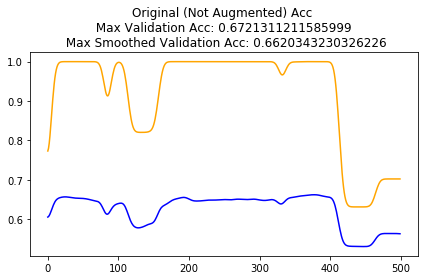

In [24]:
aValAcc0=np.array(dOrig[0].history['val_acc'])
aValAcc1=np.array(dOrig[1].history['val_acc'])
aValAcc2=np.array(dOrig[2].history['val_acc'])
aMeanValAcc=(aValAcc0+aValAcc2+aValAcc2)/3.0

aAcc0=np.array(dOrig[0].history['acc'])
aAcc1=np.array(dOrig[1].history['acc'])
aAcc2=np.array(dOrig[2].history['acc'])
aMeanAcc=(aAcc0+aAcc2+aAcc2)/3.0
    
# plt.plot(range(len(aValAcc0)), fSmooth(aValAcc0), 'orange')
# plt.plot(range(len(aValAcc1)), fSmooth(aValAcc1), 'orange')
# plt.plot(range(len(aValAcc2)), fSmooth(aValAcc2), 'orange')
plt.plot(range(len(aMeanValAcc)), fSmooth(aMeanValAcc), 'blue')
# plt.plot(range(len(aAcc0)), fSmooth(aAcc0), 'blue')
# plt.plot(range(len(aAcc1)), fSmooth(aAcc1), 'blue')
# plt.plot(range(len(aAcc2)), fSmooth(aAcc2), 'blue')
plt.plot(range(len(aMeanAcc)), fSmooth(aMeanAcc), 'orange')

print(f'Max Validation Acc: {np.max(aMeanValAcc)}')
print(f'Max Smoothed Validation Acc: {np.max(fSmooth(aMeanValAcc))}')


plt.title(f'Original (Not Augmented) Acc \n Max Validation Acc: {np.max(aMeanValAcc)} \n Max Smoothed Validation Acc: {np.max(fSmooth(aMeanValAcc))}')
plt.tight_layout()
plt.savefig(f'{sSaveLoc}/Original_trial3.png')

In [37]:
pdViolinPlotData=pd.DataFrame(columns=['Additional Samples', 'Decomp Method', 'Noise', 'Cross Val Fold', 'Tr/Val', 'Max Acc', 'Min Loss', 'Max smoothed Acc', 'Min smoothed Loss'])
pdViolinPlotData

,Additional Samples,Decomp Method,Noise,Cross Val Fold,Tr/Val,Max Acc,Min Loss,Max smoothed Acc,Min smoothed Loss


In [38]:
pdViolinPlotData.loc[0]=[0,'N/A', 'N/A', 0, 'Tr', np.max(np.array(dOrig[0].history['acc'])), np.min(np.array(dOrig[0].history['loss'])), np.max(fSmooth(np.array(dOrig[0].history['acc']))), fSmooth(np.min(np.array(dOrig[0].history['loss'])))]
pdViolinPlotData.loc[1]=[0,'N/A', 'N/A', 1, 'Tr', np.max(np.array(dOrig[1].history['acc'])), np.min(np.array(dOrig[1].history['loss'])), np.max(fSmooth(np.array(dOrig[1].history['acc']))), fSmooth(np.min(np.array(dOrig[1].history['loss'])))]
pdViolinPlotData.loc[2]=[0,'N/A', 'N/A', 2, 'Tr', np.max(np.array(dOrig[2].history['acc'])), np.min(np.array(dOrig[2].history['loss'])), np.max(fSmooth(np.array(dOrig[2].history['acc']))), fSmooth(np.min(np.array(dOrig[2].history['loss'])))]
pdViolinPlotData.loc[3]=[0,'N/A', 'N/A', 0, 'Val', np.max(np.array(dOrig[0].history['val_acc'])), np.min(np.array(dOrig[0].history['val_loss'])), np.max(fSmooth(np.array(dOrig[0].history['val_acc']))), fSmooth(np.min(np.array(dOrig[0].history['val_loss'])))]
pdViolinPlotData.loc[4]=[0,'N/A', 'N/A', 1, 'Val', np.max(np.array(dOrig[1].history['val_acc'])), np.min(np.array(dOrig[1].history['val_loss'])), np.max(fSmooth(np.array(dOrig[1].history['val_acc']))), fSmooth(np.min(np.array(dOrig[1].history['val_loss'])))]
pdViolinPlotData.loc[5]=[0,'N/A', 'N/A', 2, 'Val', np.max(np.array(dOrig[2].history['val_acc'])), np.min(np.array(dOrig[2].history['val_loss'])), np.max(fSmooth(np.array(dOrig[2].history['val_acc']))), fSmooth(np.min(np.array(dOrig[2].history['val_loss'])))]

In [39]:
pdViolinPlotData

,Additional Samples,Decomp Method,Noise,Cross Val Fold,Tr/Val,Max Acc,Min Loss,Max smoothed Acc,Min smoothed Loss
0,0,N/A,N/A,0,Tr,1.000000,0.059637,1.000000,0.059636738151311874
1,0,N/A,N/A,1,Tr,1.000000,0.072203,1.000000,0.07220292463898659
2,0,N/A,N/A,2,Tr,1.000000,0.081005,1.000000,0.0810052789747715
3,0,N/A,N/A,0,Val,0.684426,0.826843,0.676830,0.8268433809280396
4,0,N/A,N/A,1,Val,0.704918,0.814099,0.697700,0.8140985369682312
5,0,N/A,N/A,2,Val,0.672131,0.812105,0.661019,0.8121050000190735
